# Comprehensive Model Evaluation Results Analysis

 This notebook provides detailed analysis of the multi-pass entity extraction evaluation results. We'll examine model performance across different entity types, analyze computational efficiency, and identify the best-performing models for each task. The analysis focuses on Toptal-specific metrics and includes time-per-token efficiency calculations.

 ## Setup: Import required libraries and load data

In [34]:
# %%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

from notebook_config import EXPERIMENTAL_RESULTS_DIR
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")

In [35]:
# %%

# Load the evaluation results
results_file = Path(EXPERIMENTAL_RESULTS_DIR / "model_evaluation_results_multi_pass.csv")
df = pd.read_csv(results_file)
df["model_name"] = df["model_name"] + "-" + df["model"].astype(str)

print(f"Loaded {len(df)} model evaluation results")
print(f"Columns: {len(df.columns)}")
print(f"Models evaluated: {df['model_name'].nunique()}")

Loaded 35 model evaluation results
Columns: 84
Models evaluated: 7


## Data Overview and Preprocessing

 Examine the structure of our evaluation results and prepare the data for analysis:

 **Dataset Characteristics:**
 - **Model diversity**: Multiple model types (LLM, transformer, rule-based)
 - **Entity types**: Persons, organizations, and locations
 - **Performance metrics**: Toptal-specific evaluation criteria
 - **Timing data**: Training, inference, and evaluation times

 **Data Preparation:**
 - Clean and validate metric columns
 - Calculate derived metrics (time per token)
 - Organize data for comparative analysis

In [36]:
# %%

# Display basic information about the dataset
print("Dataset Overview:")
print(f"Total models evaluated: {len(df)}")
print(f"Unique model names: {df['model_name'].nunique()}")
print(f"Model types: {df['type'].unique()}")

print("\nModel Types Distribution:")
print(df['type'].value_counts())

print("\nModel Names:")
for i, name in enumerate(df['model_name'].unique()):
    print(f"  {i+1}. {name}")

Dataset Overview:
Total models evaluated: 35
Unique model names: 7
Model types: ['transformer' 'rule-based']

Model Types Distribution:
type
transformer    20
rule-based     15
Name: count, dtype: int64

Model Names:
  1. PretrainedBertEntityExtractorPure-distilbert_ner_finetuned
  2. PretrainedBertEntityExtractor-distilbert_ner_finetuned
  3. HuggingFaceEntityExtractor-dslim/bert-base-NER
  4. HuggingFaceEntityExtractor-dslim/distilbert-NER
  5. SlidingWindowExtractor-nan
  6. SpacyEntityExtractor-en_core_web_sm
  7. SpacyEntityExtractor-en_core_web_md


## Calculate Time per Token Metrics

 Compute efficiency metrics to understand computational performance:

 **Time per Token Calculations:**
 - **Training time per token**: Efficiency during model training
 - **Inference time per token**: Real-time prediction speed
 - **Total time per token**: Overall computational cost

 **Efficiency Analysis:**
 - Compare models across different efficiency dimensions
 - Identify trade-offs between accuracy and speed
 - Highlight cost-effective solutions for different use cases

In [37]:
# %%

# Calculate time per token metrics for each entity type
entity_types = ['persons', 'organizations', 'locations']

for entity_type in entity_types:
    # Training time per token
    df[f'{entity_type}_training_time_per_token'] = (
        df[f'stats.{entity_type}.training.time'] / 
        df[f'stats.{entity_type}.training.words']
    )
    
    # Inference time per token
    df[f'{entity_type}_inference_time_per_token'] = (
        df[f'stats.{entity_type}.inference.time'] / 
        df[f'stats.{entity_type}.inference.words']
    )
    
    # Total time per token
    df[f'{entity_type}_total_time_per_token'] = (
        (df[f'stats.{entity_type}.training.time'] + df[f'stats.{entity_type}.inference.time']) / 
        df[f'stats.{entity_type}.training.words']
    )

print("Time per token metrics calculated for all entity types")

Time per token metrics calculated for all entity types


## Extract Toptal Metrics for Analysis

 Focus on the Toptal-specific evaluation metrics that are most relevant for our analysis:

 **Toptal Metrics:**
 - **Precision**: Accuracy of positive predictions
 - **Recall**: Coverage of actual entities
 - **Jaccard**: Intersection over union similarity
 - **F1 Score**: Harmonic mean of precision and recall
 - **Accuracy**: Overall correctness

 **Analysis Scope:**
 - Multi-word entity recognition performance
 - Entity type-specific analysis
 - Model comparison across different entity categories

In [38]:
# %%

# Extract Toptal metrics for each entity type
toptal_metrics = ['precision', 'recall', 'jaccard', 'f1', 'accuracy']

for entity_type in entity_types:
    for metric in toptal_metrics:
        df[f'{entity_type}_toptal_{metric}'] = df[f'stats.{entity_type}.evaluation.metrics.toptal.multi_word.{metric}']

print("Toptal metrics extracted for all entity types")

Toptal metrics extracted for all entity types


## Model Performance Overview

 Create a comprehensive overview of model performance across all entity types:

 **Performance Dimensions:**
 - **Accuracy metrics**: Precision, recall, F1 scores
 - **Efficiency metrics**: Time per token calculations
 - **Model type comparison**: LLM vs transformer vs rule-based
 - **Entity type analysis**: Performance variation across entity categories

 **Visualization Strategy:**
 - Heatmaps for metric comparison
 - Bar plots for model ranking
 - Scatter plots for accuracy vs efficiency trade-offs

In [39]:
# %%

# Create a summary dataframe with key metrics
summary_metrics = ['precision', 'recall', 'f1', 'accuracy']
summary_df = df[['model_name', 'type', 'description']].copy()

# Add average metrics across entity types
for metric in summary_metrics:
    metric_cols = [f'{entity_type}_toptal_{metric}' for entity_type in entity_types]
    summary_df[f'avg_{metric}'] = df[metric_cols].mean(axis=1)

# Add efficiency metrics
efficiency_cols = [f'{entity_type}_total_time_per_token' for entity_type in entity_types]
summary_df['avg_time_per_token'] = df[efficiency_cols].mean(axis=1)

print("Model Performance Summary:")
print(summary_df.round(4))

Model Performance Summary:
                                           model_name         type  \
0   PretrainedBertEntityExtractorPure-distilbert_n...  transformer   
1   PretrainedBertEntityExtractor-distilbert_ner_f...  transformer   
2      HuggingFaceEntityExtractor-dslim/bert-base-NER  transformer   
3     HuggingFaceEntityExtractor-dslim/distilbert-NER  transformer   
4                          SlidingWindowExtractor-nan   rule-based   
5                 SpacyEntityExtractor-en_core_web_sm   rule-based   
6                 SpacyEntityExtractor-en_core_web_md   rule-based   
7   PretrainedBertEntityExtractorPure-distilbert_n...  transformer   
8   PretrainedBertEntityExtractor-distilbert_ner_f...  transformer   
9      HuggingFaceEntityExtractor-dslim/bert-base-NER  transformer   
10    HuggingFaceEntityExtractor-dslim/distilbert-NER  transformer   
11                         SlidingWindowExtractor-nan   rule-based   
12                SpacyEntityExtractor-en_core_web_sm   rule-ba

## Comprehensive Performance Heatmap

 Visualize model performance across all entity types and metrics using a heatmap:

 **Heatmap Features:**
 - **Rows**: Different models
 - **Columns**: Entity types and metrics
 - **Color intensity**: Performance scores (higher = better)
 - **Pattern identification**: Model strengths and weaknesses

 **Analysis Insights:**
 - Identify best-performing models for each entity type
 - Spot performance patterns across model types
 - Highlight areas for improvement

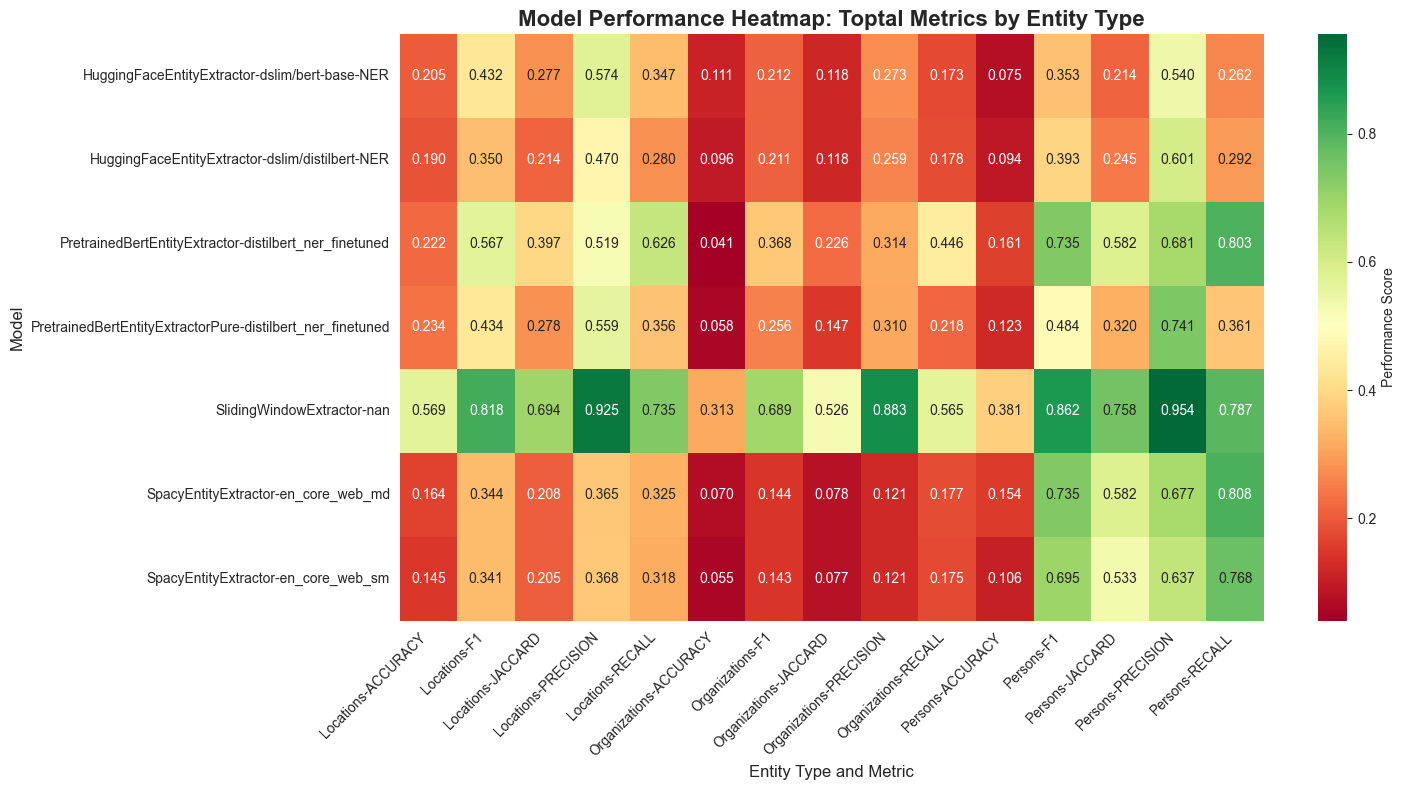

In [40]:
# %%

# Prepare data for heatmap
heatmap_data = []
for _, row in df.iterrows():
    for entity_type in entity_types:
        for metric in toptal_metrics:
            value = row[f'{entity_type}_toptal_{metric}']
            heatmap_data.append({
                'Model': row['model_name'],
                'Entity_Type': entity_type.title(),
                'Metric': metric.upper(),
                'Value': value
            })

heatmap_df = pd.DataFrame(heatmap_data)

# Create heatmap
plt.figure(figsize=(15, 8))
pivot_data = heatmap_df.pivot_table(
    values='Value', 
    index='Model', 
    columns=['Entity_Type', 'Metric'], 
    aggfunc='mean'
)

# Create the heatmap
sns.heatmap(
    pivot_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn', 
    center=0.5,
    cbar_kws={'label': 'Performance Score'}
)

plt.title('Model Performance Heatmap: Toptal Metrics by Entity Type', fontsize=16, fontweight='bold')
plt.xlabel('Entity Type and Metric', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Model Ranking by Entity Type

 Create bar plots showing the top-performing models for each entity type:

 **Ranking Analysis:**
 - **Person entities**: Models best at recognizing individual names
 - **Organization entities**: Models for company and institution recognition
 - **Location entities**: Models for geographical and place name extraction

 **Visualization Features:**
 - **F1 Score focus**: Balanced measure of precision and recall
 - **Model type color coding**: Distinguish between LLM, transformer, and rule-based
 - **Performance thresholds**: Highlight models above certain performance levels

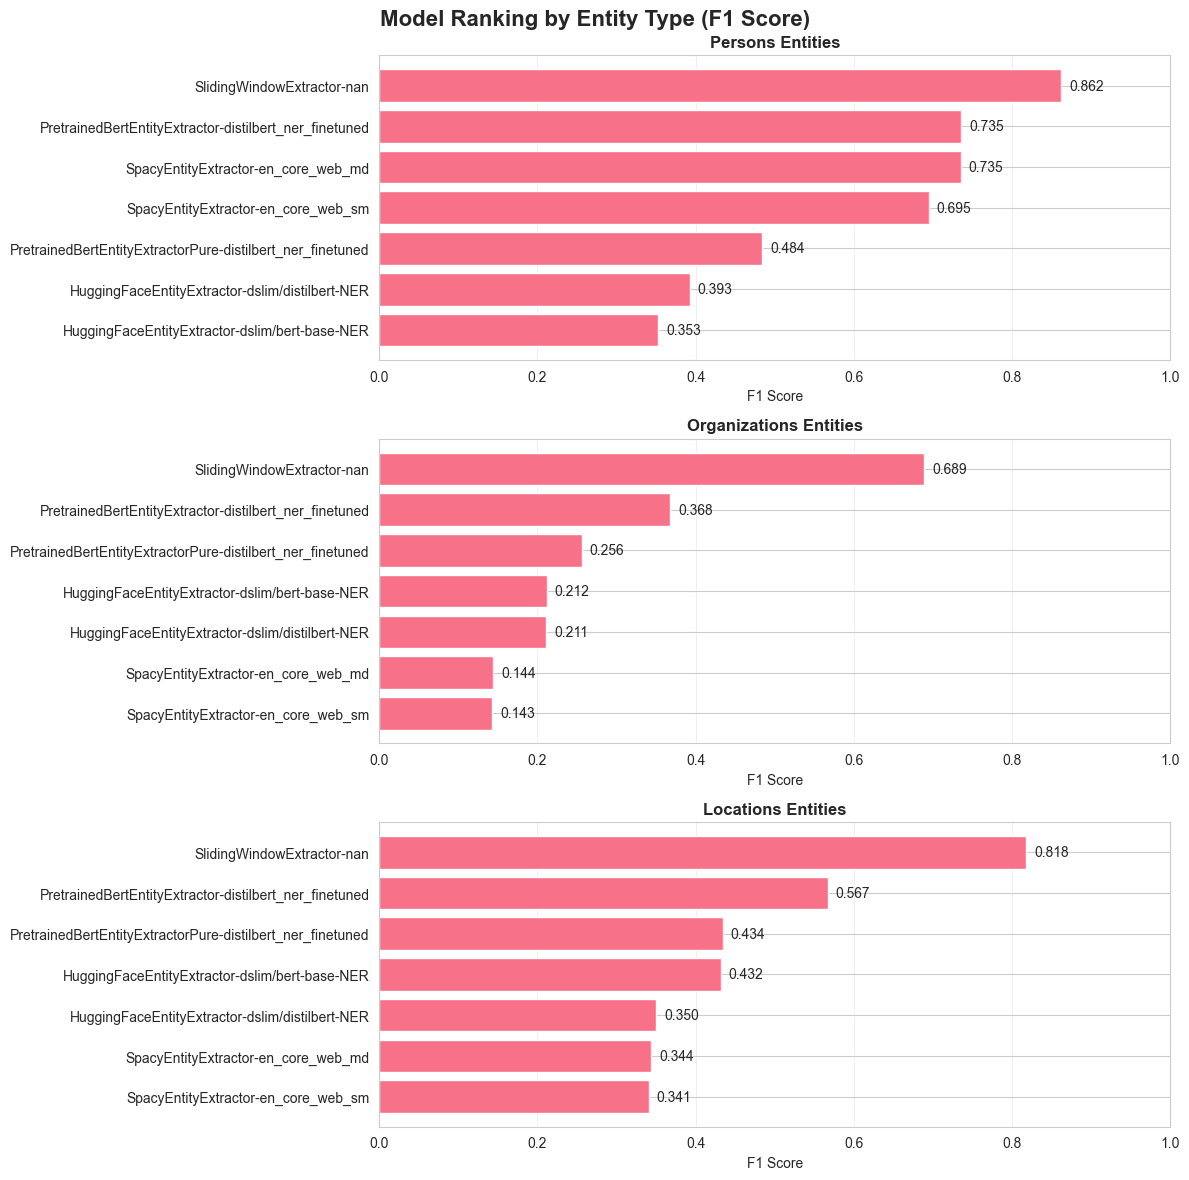

In [49]:
# %%

# Create ranking plots for each entity type
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('Model Ranking by Entity Type (F1 Score)', fontsize=16, fontweight='bold')

for i, entity_type in enumerate(entity_types):
    # Sort by F1 score
    entity_data = df.groupby("model_name").mean("mean").sort_values(f'{entity_type}_toptal_f1', ascending=True).reset_index()
    
    # Create horizontal bar plot
    bars = axes[i].barh(
        entity_data['model_name'], 
        entity_data[f'{entity_type}_toptal_f1'],
        # color=[sns.color_palette("husl")[j] for j in range(len(entity_data))]
    )
    
    # Add value labels on bars
    for bar, value in zip(bars, entity_data[f'{entity_type}_toptal_f1']):
        axes[i].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{value:.3f}', va='center', fontsize=10)
    
    axes[i].set_title(f'{entity_type.title()} Entities', fontweight='bold')
    axes[i].set_xlabel('F1 Score')
    axes[i].set_xlim(0, 1)
    
    # Add grid
    axes[i].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Accuracy vs Efficiency Trade-off Analysis

 Analyze the relationship between model accuracy and computational efficiency:

 **Trade-off Dimensions:**
 - **Accuracy**: F1 scores across entity types
 - **Efficiency**: Time per token calculations
 - **Model type patterns**: Performance characteristics by model category

 **Scatter Plot Features:**
 - **X-axis**: Average time per token (lower = more efficient)
 - **Y-axis**: Average F1 score (higher = more accurate)
 - **Point size**: Total processing time
 - **Color coding**: Model types

 **Analysis Insights:**
 - Identify Pareto-optimal models
 - Spot efficiency outliers
 - Guide model selection based on requirements

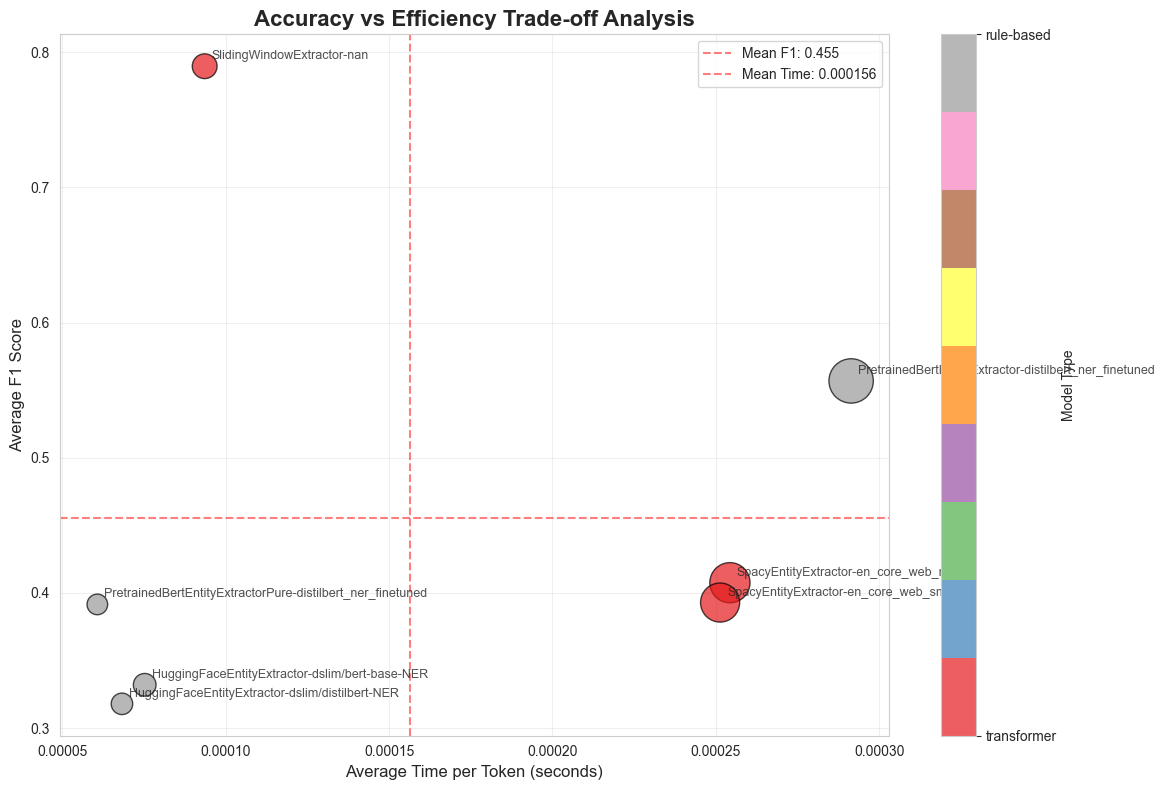

In [42]:
# %%

# Create scatter plot for accuracy vs efficiency
plt.figure(figsize=(12, 8))

# Calculate average metrics
df_agg = df.groupby(["model_name", 'type']).mean(numeric_only=True).reset_index()
avg_f1 = df_agg[[f'{entity_type}_toptal_f1' for entity_type in entity_types]].mean(axis=1)
avg_time_per_token = df_agg[[f'{entity_type}_inference_time_per_token' for entity_type in entity_types]].mean(axis=1)

# Create scatter plot
scatter = plt.scatter(
    avg_time_per_token, 
    avg_f1, 
    s=df_agg['total_time'] * 10,  # Size based on total time
    c=pd.Categorical(df_agg['type']).codes,  # Color by model type
    cmap='Set1',
    alpha=0.7,
    edgecolors='black',
    linewidth=1
)

# Add model labels
for i, model_name in enumerate(df_agg['model_name']):
    plt.annotate(
        model_name, 
        (avg_time_per_token.iloc[i], avg_f1.iloc[i]),
        xytext=(5, 5), 
        textcoords='offset points',
        fontsize=9,
        alpha=0.8
    )

# Add colorbar for model types
cbar = plt.colorbar(scatter)
cbar.set_label('Model Type')
cbar.set_ticks(range(len(df_agg['type'].unique())))
cbar.set_ticklabels(df_agg['type'].unique())

plt.xlabel('Average Time per Token (seconds)', fontsize=12)
plt.ylabel('Average F1 Score', fontsize=12)
plt.title('Accuracy vs Efficiency Trade-off Analysis', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add quadrant lines
plt.axhline(y=avg_f1.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean F1: {avg_f1.mean():.3f}')
plt.axvline(x=avg_time_per_token.mean(), color='red', linestyle='--', alpha=0.5, label=f'Mean Time: {avg_time_per_token.mean():.6f}')
plt.legend()

plt.tight_layout()
plt.show()

## Detailed Performance Metrics Comparison

 Create detailed comparison charts for each performance metric:

 **Metric Analysis:**
 - **Precision**: How many predicted entities are correct
 - **Recall**: How many actual entities were found
 - **Jaccard**: Intersection over union similarity
 - **Accuracy**: Overall correctness

 **Visualization Approach:**
 - **Grouped bar charts**: Compare models across entity types
 - **Metric-specific insights**: Identify model strengths
 - **Performance patterns**: Understand model behavior

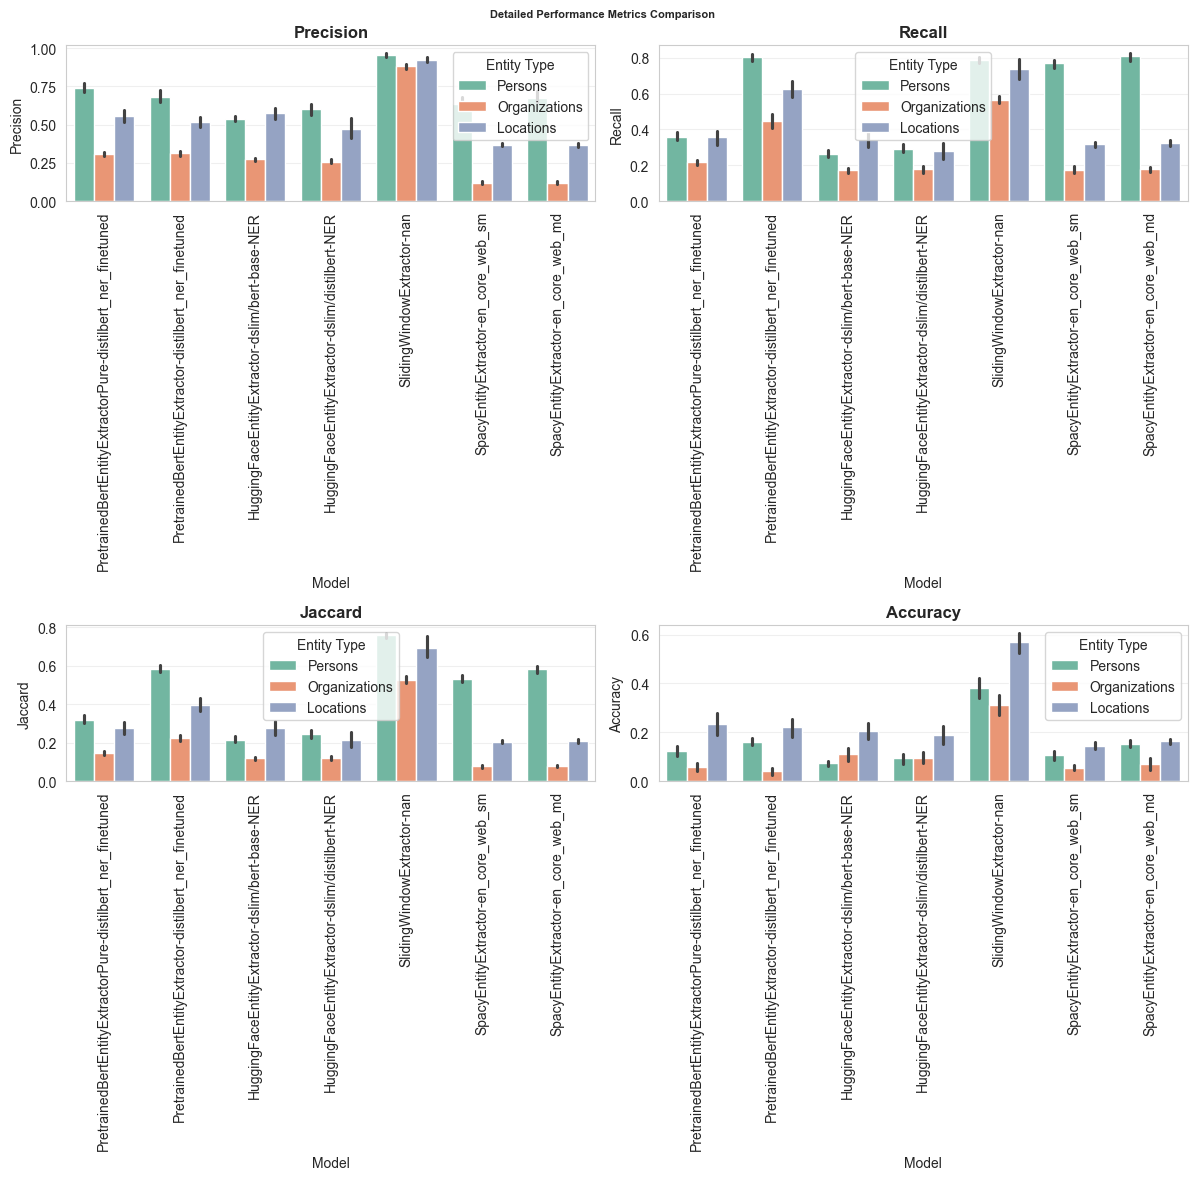

In [43]:
# %%

# Create detailed metric comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Detailed Performance Metrics Comparison', fontsize=8, fontweight='bold')

metrics = ['precision', 'recall', 'jaccard', 'accuracy']
metric_titles = ['Precision', 'Recall', 'Jaccard', 'Accuracy']

for idx, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Prepare data for this metric
    metric_data = []
    for _, row in df.iterrows():
        for entity_type in entity_types:
            metric_data.append({
                'Model': row['model_name'],
                'Entity_Type': entity_type.title(),
                'Value': row[f'{entity_type}_toptal_{metric}']
            })
    
    metric_df = pd.DataFrame(metric_data)
    
    # Create grouped bar plot
    sns.barplot(
        data=metric_df, 
        x='Model', 
        y='Value', 
        hue='Entity_Type',
        ax=ax,
        palette='Set2'
    )
    
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Model')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=90)
    ax.legend(title='Entity Type')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Time Efficiency Analysis

 Analyze computational efficiency across different models and entity types:

 **Efficiency Metrics:**
 - **Training time per token**: Model preparation efficiency
 - **Inference time per token**: Real-time prediction speed
 - **Total time per token**: Overall computational cost

 **Analysis Focus:**
 - **Model type efficiency**: Compare LLM, transformer, and rule-based approaches
 - **Entity type variation**: Efficiency differences across entity categories
 - **Scalability insights**: Performance implications for large-scale deployment

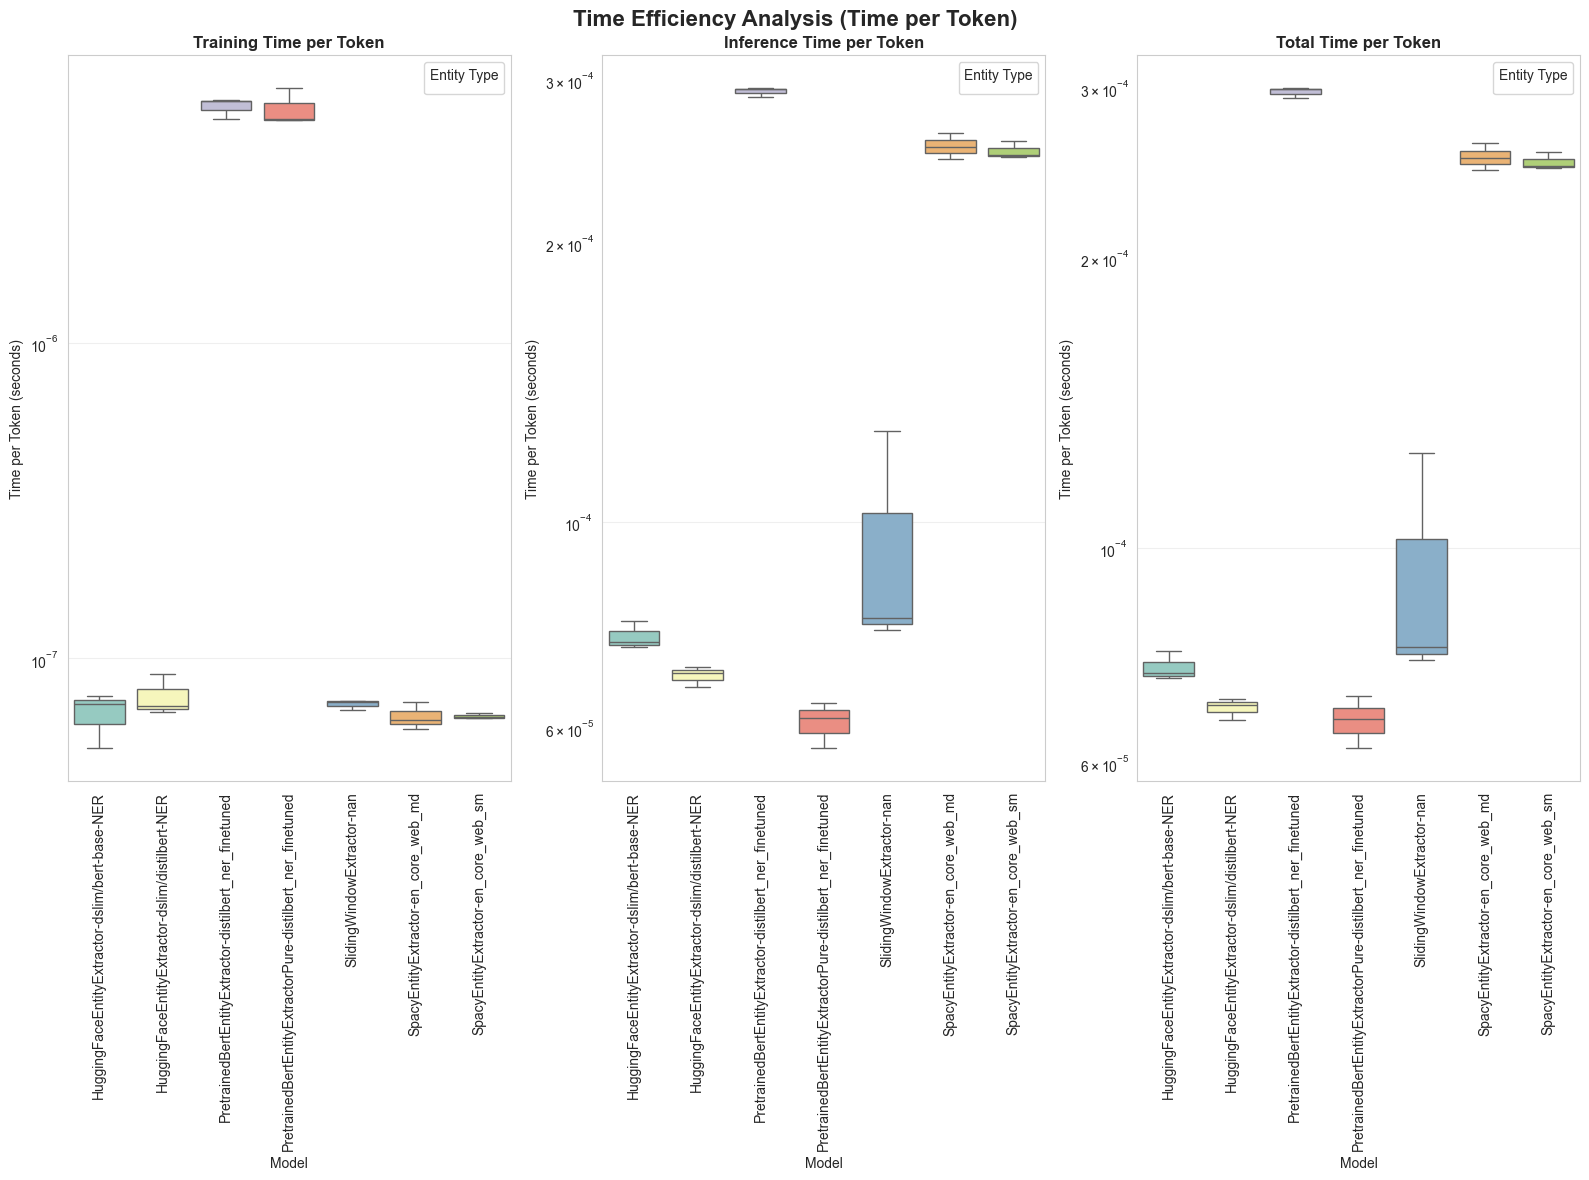

In [44]:
# %%
df_agg_time = df.groupby(["model_name"]).mean(numeric_only=True).reset_index()
# Create time efficiency analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 12))
fig.suptitle('Time Efficiency Analysis (Time per Token)', fontsize=16, fontweight='bold')

time_metrics = ['training_time_per_token', 'inference_time_per_token', 'total_time_per_token']
time_titles = ['Training Time per Token', 'Inference Time per Token', 'Total Time per Token']

for i, (metric, title) in enumerate(zip(time_metrics, time_titles)):
    # Prepare data for this metric
    time_data = []
    for _, row in df_agg_time.iterrows():
        for entity_type in entity_types:
            time_data.append({
                'Model': row['model_name'],
                'Entity_Type': entity_type.title(),
                'Value': row[f'{entity_type}_{metric}']
            })
    
    time_df = pd.DataFrame(time_data)
    
    # Create box plot
    sns.boxplot(
        data=time_df, 
        x='Model', 
        y='Value', 
        # hue='Entity_Type',
        ax=axes[i],
        palette='Set3'
    )
    
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Time per Token (seconds)')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(title='Entity Type')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Use log scale for better visualization
    axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

## Key Findings and Recommendations

 Summarize the analysis results and provide actionable insights:

 **Performance Highlights:**
 - **Best overall models**: Top performers across all metrics
 - **Entity-specific champions**: Best models for each entity type
 - **Efficiency leaders**: Most cost-effective solutions

 **Recommendations:**
 - **Production deployment**: Models suitable for real-world applications
 - **Research applications**: Models for experimental and development work
 - **Resource constraints**: Solutions for limited computational resources

 **Future Directions:**
 - **Model improvement opportunities**: Areas for enhancement
 - **Hybrid approaches**: Combining strengths of different model types
 - **Scalability considerations**: Performance at larger scales